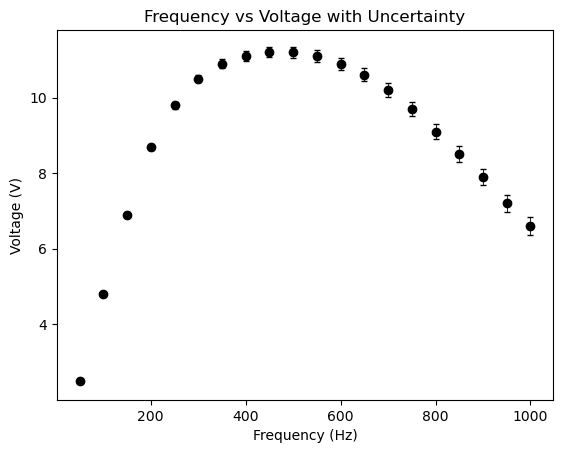

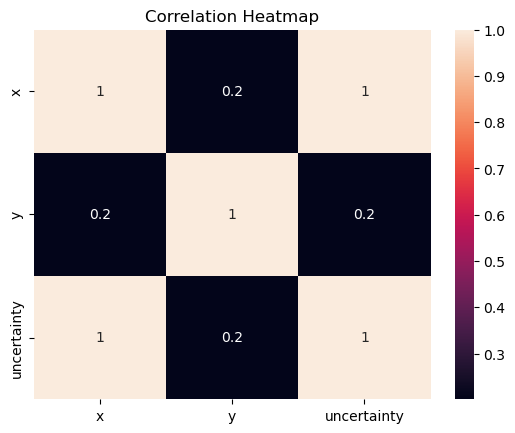


Descriptive Statistics:
                  x          y  uncertainty
count    20.000000  20.000000    20.000000
mean    525.000000   8.970000     0.145000
std     295.803989   2.383518     0.059161
min      50.000000   2.500000     0.050000
25%     287.500000   7.725000     0.097500
50%     525.000000   9.750000     0.145000
75%     762.500000  10.900000     0.192500
max    1000.000000  11.200000     0.240000

Notes:
- 'count': Number of data points.
- 'mean': Average value.
- 'std': Standard deviation (variation from the mean).
- 'min' & 'max': Minimum and maximum values respectively.
- Quartiles: '25%', '50%' (median), and '75%'.


R^2 value: 0.92
This suggests that 91.51% of the voltage variance is explained by the polynomial model.

Regression Coefficients:
Intercept (A): 0.0000
Linear Coefficient (B): 0.0324
Quadratic Coefficient (C): -0.0000

Interpretation:
A: Predicted voltage when frequency is 0.
B: Change in voltage for a one-unit change in frequency, holding other factors co

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

# Function to load the dataset and preprocess it
def load_and_preprocess_data(filename):
    # Read the dataset from the given CSV file
    data = pd.read_csv(filename)
    
    # Replace any missing values with the mean of the respective column
    data.fillna(data.mean(), inplace=True)
    
    return data

# Function to visualize the dataset using scatter plots and heatmaps
def visualize_data(data):
    # Plot the data points with error bars representing uncertainty
    plt.errorbar(data['x'], data['y'], yerr=data['uncertainty'], fmt='o', color='black', capsize=2, elinewidth=0.6)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Voltage (V)")
    plt.title("Frequency vs Voltage with Uncertainty")
    plt.show()

    # Display a heatmap to visualize the correlation between different variables in the dataset
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title("Correlation Heatmap")
    plt.show()

# Function to perform polynomial regression on the dataset
def polynomial_regression_analysis(data, degree=2):
    # Extract input and output variables
    X = data[['x']]
    y = data['y']
    
    # Transform input data to polynomial features of the specified degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Train a linear regression model on the polynomial features
    regressor = LinearRegression()
    regressor.fit(X_poly, y)
    y_pred = regressor.predict(X_poly)
    
    # Calculate the R-squared value to measure the goodness of fit of the model
    r2 = r2_score(y, y_pred)
    return r2, regressor.coef_

# Function to perform hypothesis testing on the dataset
def hypothesis_testing(data):
    # Split the dataset into two halves based on the median value of 'x'
    first_half = data[data['x'] < data['x'].median()]['y']
    second_half = data[data['x'] >= data['x'].median()]['y']
    
    # Perform an independent t-test to compare the means of the two halves
    t_stat, p_val = stats.ttest_ind(first_half, second_half)
    return t_stat, p_val

# Function to display descriptive statistics of the dataset
def descriptive_statistics(data):
    # Calculate and print basic statistics like mean, median, standard deviation, etc.
    desc_stats = data.describe()
    print("\nDescriptive Statistics:\n", desc_stats)
    print("\nNotes:\n- 'count': Number of data points.")
    print("- 'mean': Average value.\n- 'std': Standard deviation (variation from the mean).")
    print("- 'min' & 'max': Minimum and maximum values respectively.")
    print("- Quartiles: '25%', '50%' (median), and '75%'.\n")

# Function to check if the residuals from the regression model are normally distributed
def check_residual_normality(residuals):
    # Perform a normality test on the residuals
    k2, p = stats.normaltest(residuals)
    alpha = 0.05
    if p < alpha:
        print("\nResiduals aren't normally distributed, suggesting potential non-linearity or other complexities.")
    else:
        print("\nResiduals appear normally distributed, indicating that the model fits the data well.\n")

# Main function to perform the entire analysis
def analyze_circuit_data(filename):
    # Load and preprocess the dataset
    data = load_and_preprocess_data(filename)
    
    # Visualize the dataset
    visualize_data(data)

    # Display descriptive statistics
    descriptive_statistics(data)
    
    # Perform polynomial regression and display results
    r2, coefficients = polynomial_regression_analysis(data, degree=2)
    print(f"\nR^2 value: {r2:.2f}")
    print(f"This suggests that {r2*100:.2f}% of the voltage variance is explained by the polynomial model.")
    
    # Display and interpret regression coefficients
    print(f"\nRegression Coefficients:")
    print(f"Intercept (A): {coefficients[0]:.4f}")
    print(f"Linear Coefficient (B): {coefficients[1]:.4f}")
    print(f"Quadratic Coefficient (C): {coefficients[2]:.4f}")
    print("\nInterpretation:")
    print("A: Predicted voltage when frequency is 0.")
    print("B: Change in voltage for a one-unit change in frequency, holding other factors constant.")
    print("C: Rate of change in voltage's rate of change for a one-unit increase in frequency.\n")

    # Residual Analysis
    def regression_residuals(data, degree=2):
        X = data[['x']]
        y = data['y']
    
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
    
        regressor = LinearRegression()
        regressor.fit(X_poly, y)
        y_pred = regressor.predict(X_poly)
    
        residuals = y - y_pred
        return residuals

    # Analyze residuals to check model validity
    residuals = regression_residuals(data, degree=2)
    check_residual_normality(residuals)

    # Outlier Detection
    def detect_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
        return data[outliers]

    # Detect and display any outliers in the dataset
    outliers = detect_outliers(data)
    if not outliers.empty:
        print("\nPotential Outliers Detected:\n", outliers)
        print("These points deviate significantly from the others and may affect the model's accuracy.\n")
    else:
        print("\nNo significant outliers detected in the dataset.\n")

    # Perform hypothesis testing and display results
    t_stat, p_val = hypothesis_testing(data)
    print(f"\nT-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Given the p-value, there's a significant difference in voltage between the two data halves.")
    else:
        print("The p-value suggests no significant voltage difference between the two data halves.\n")

# Example usage
analyze_circuit_data('your_data.csv')
